In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# 1 - preprocessing


In [2]:
data = pd.read_csv("data/Bank Customer Churn Prediction.csv")
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
print(data.head())
print(data.info())
print(data.describe())

   customer_id  credit_score country  gender  age  tenure    balance  \
0     15634602           619  France  Female   42       2       0.00   
1     15647311           608   Spain  Female   41       1   83807.86   
2     15619304           502  France  Female   42       8  159660.80   
3     15701354           699  France  Female   39       1       0.00   
4     15737888           850   Spain  Female   43       2  125510.82   

   products_number  credit_card  active_member  estimated_salary  churn  
0                1            1              1         101348.88      1  
1                1            0              1         112542.58      0  
2                3            1              0         113931.57      1  
3                2            0              0          93826.63      0  
4                1            1              1          79084.10      0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column    

In [4]:
data.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

<Axes: >

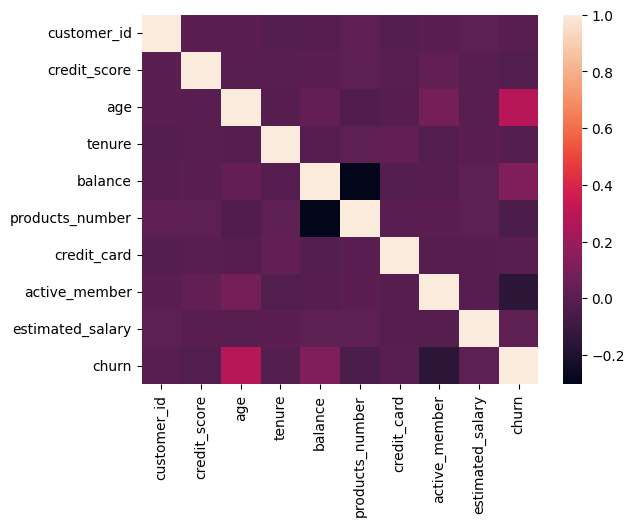

In [5]:
sns.heatmap(data.select_dtypes(exclude="object").corr())

# Feature Engineering

In [6]:
data['Credit_Score_Salary_Interaction'] = data['credit_score'] * data['estimated_salary']

data['Age_Tenure_Interaction'] = data['age'] * data['tenure']

data

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,Credit_Score_Salary_Interaction,Age_Tenure_Interaction
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,62734956.72,84
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,68425888.64,41
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,57193648.14,336
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,65584814.37,39
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,67221485.00,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0,74224663.44,195
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,52477081.32,350
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1,29838676.22,252
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,71709937.44,126


In [7]:
onehot = OneHotEncoder(handle_unknown="ignore")
encoded_columns = onehot.fit_transform(data.select_dtypes(include="object")).toarray()

In [8]:
encoded_columns.shape

(10000, 5)

In [9]:
onehot.get_feature_names_out()

array(['country_France', 'country_Germany', 'country_Spain',
       'gender_Female', 'gender_Male'], dtype=object)

In [10]:
# drop all categorical features
data = data.select_dtypes(exclude="object")

# assigning encoded columns to column names
data[onehot.get_feature_names_out()] = encoded_columns

In [11]:
data

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,Credit_Score_Salary_Interaction,Age_Tenure_Interaction,country_France,country_Germany,country_Spain,gender_Female,gender_Male
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,62734956.72,84,1.0,0.0,0.0,1.0,0.0
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,68425888.64,41,0.0,0.0,1.0,1.0,0.0
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,57193648.14,336,1.0,0.0,0.0,1.0,0.0
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,65584814.37,39,1.0,0.0,0.0,1.0,0.0
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,67221485.00,86,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,39,5,0.00,2,1,0,96270.64,0,74224663.44,195,1.0,0.0,0.0,0.0,1.0
9996,15569892,516,35,10,57369.61,1,1,1,101699.77,0,52477081.32,350,1.0,0.0,0.0,0.0,1.0
9997,15584532,709,36,7,0.00,1,0,1,42085.58,1,29838676.22,252,1.0,0.0,0.0,1.0,0.0
9998,15682355,772,42,3,75075.31,2,1,0,92888.52,1,71709937.44,126,0.0,1.0,0.0,0.0,1.0


In [12]:
data.drop(["credit_score", "estimated_salary", "tenure", "age"],
          axis=1, inplace=True)

In [13]:
data

,customer_id,balance,products_number,credit_card,active_member,churn,Credit_Score_Salary_Interaction,Age_Tenure_Interaction,country_France,country_Germany,country_Spain,gender_Female,gender_Male
0,15634602,0.00,1,1,1,1,62734956.72,84,1.0,0.0,0.0,1.0,0.0
1,15647311,83807.86,1,0,1,0,68425888.64,41,0.0,0.0,1.0,1.0,0.0
2,15619304,159660.80,3,1,0,1,57193648.14,336,1.0,0.0,0.0,1.0,0.0
3,15701354,0.00,2,0,0,0,65584814.37,39,1.0,0.0,0.0,1.0,0.0
4,15737888,125510.82,1,1,1,0,67221485.00,86,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,0.00,2,1,0,0,74224663.44,195,1.0,0.0,0.0,0.0,1.0
9996,15569892,57369.61,1,1,1,0,52477081.32,350,1.0,0.0,0.0,0.0,1.0
9997,15584532,0.00,1,0,1,1,29838676.22,252,1.0,0.0,0.0,1.0,0.0
9998,15682355,75075.31,2,1,0,1,71709937.44,126,0.0,1.0,0.0,0.0,1.0


In [14]:
data['churn'].value_counts()

churn
0    7963
1    2037
Name: count, dtype: int64

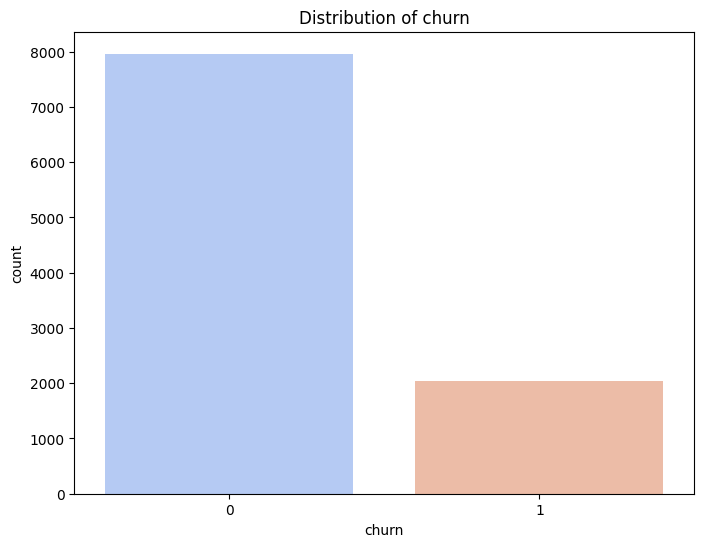

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8, 6))
sns.countplot(x = 'churn', data = data, palette='coolwarm')
plt.title('Distribution of churn')
plt.xlabel('churn')
plt.ylabel('count')
plt.show()

In [16]:
X = data.drop('churn', axis = 1)  
y = data['churn']

from imblearn.over_sampling import SMOTE
X_res, y_res = SMOTE().fit_resample(X, y)
y_res.value_counts()

churn
1    7963
0    7963
Name: count, dtype: int64

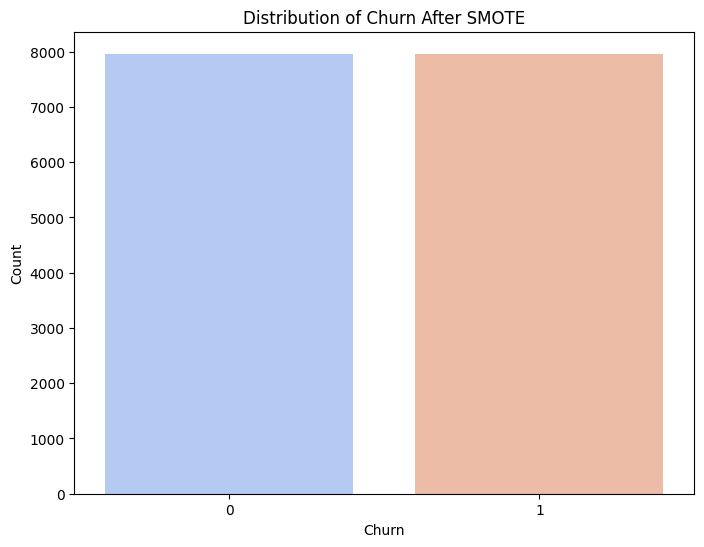

In [17]:
plt.figure(figsize=(8, 6))
sns.countplot(x=y_res, palette='coolwarm')
plt.title('Distribution of Churn After SMOTE')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

# spliting and scaling the dataset

In [18]:
#spliting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.3, random_state = 47)

#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[ 1.59802116, -1.4292374 , -0.73841347, ...,  1.93616278,
         1.07775387, -1.07775387],
       [-1.30881604,  1.13597197, -0.73841347, ..., -0.58220233,
        -1.06089315,  1.06089315],
       [-1.10695132,  0.2583629 ,  0.99972702, ...,  1.93616278,
        -1.06089315,  1.06089315],
       ...,
       [ 0.13383497, -0.75319363, -0.73841347, ...,  1.25871002,
        -1.06089315,  1.06089315],
       [ 0.37738449, -1.4292374 ,  0.99972702, ..., -0.58220233,
        -1.06089315,  1.06089315],
       [ 0.81236279,  0.48067234,  0.99972702, ..., -0.58220233,
         1.07775387, -1.07775387]])

# Modeling

In [19]:
#LogisticRegressionModel

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report

log = LogisticRegression(class_weight='balanced')
log.fit(X_train, y_train)


y_pred1 = log.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred1)}")
print(classification_report(y_test, y_pred1))

Accuracy: 0.7287568020092089
              precision    recall  f1-score   support

           0       0.75      0.70      0.73      2441
           1       0.71      0.76      0.73      2337

    accuracy                           0.73      4778
   macro avg       0.73      0.73      0.73      4778
weighted avg       0.73      0.73      0.73      4778



In [20]:
#KNeighborsClassifier Model

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred2 = knn.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred2)}")
print(classification_report(y_test, y_pred2))


Accuracy: 0.7957304311427376
              precision    recall  f1-score   support

           0       0.79      0.82      0.80      2441
           1       0.80      0.77      0.79      2337

    accuracy                           0.80      4778
   macro avg       0.80      0.80      0.80      4778
weighted avg       0.80      0.80      0.80      4778



In [21]:
#DecisionTreeClassifier Model

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred3 = dt.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred3)}")
print(classification_report(y_test, y_pred3))


Accuracy: 0.8200083717036417
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      2441
           1       0.82      0.82      0.82      2337

    accuracy                           0.82      4778
   macro avg       0.82      0.82      0.82      4778
weighted avg       0.82      0.82      0.82      4778



In [22]:
#GradientBoostingClassifier Model

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report

gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

y_pred4 = gbc.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred4)}")
print(classification_report(y_test, y_pred4))

Accuracy: 0.8606111343658435
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      2441
           1       0.90      0.80      0.85      2337

    accuracy                           0.86      4778
   macro avg       0.87      0.86      0.86      4778
weighted avg       0.86      0.86      0.86      4778



In [23]:
#xgboost Model
import xgboost as xgb

model_xgb = xgb.XGBClassifier(random_state=42, verbosity = 0)
model_xgb.fit(X_train, y_train)

y_pred5 = model_xgb.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred5)}")
print(classification_report(y_test, y_pred5))

Accuracy: 0.8629133528673085
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      2441
           1       0.89      0.83      0.86      2337

    accuracy                           0.86      4778
   macro avg       0.86      0.86      0.86      4778
weighted avg       0.86      0.86      0.86      4778



In [24]:
#accuracy summary

perfomance_summary = pd.DataFrame({
    'Model' :['LR', 'KNN', 'DT', 'GBC', 'XGB'],
    'ACC' :[accuracy_score(y_test,y_pred1),
           accuracy_score(y_test,y_pred2),
           accuracy_score(y_test,y_pred3),
           accuracy_score(y_test,y_pred4),
           accuracy_score(y_test,y_pred5),
           ]
})

perfomance_summary

,Model,ACC
0,LR,0.728757
1,KNN,0.795730
2,DT,0.820008
3,GBC,0.860611
4,XGB,0.862913


<Axes: xlabel='Model', ylabel='ACC'>

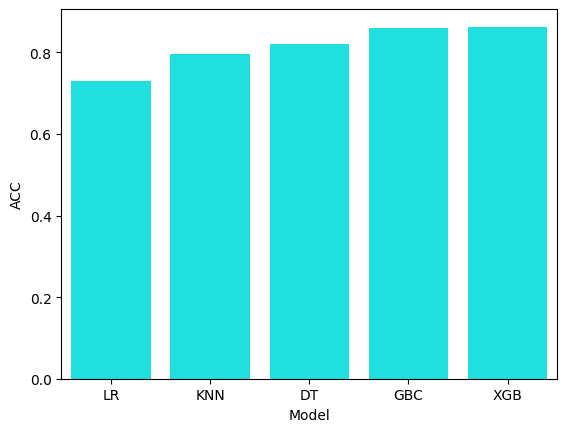

In [25]:
sns.barplot(x='Model', y='ACC', data=perfomance_summary, color='cyan')


In [26]:
#saving the best model
X_train = sc.fit_transform(X_train)
model_xgb.fit(X_res, y_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [27]:
#xgboost With GriSearch Model

import xgboost as xgb
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.7, 0.8, 0.9],
    'gamma': [0, 0.1, 0.2],
    'min_child_weight': [1, 3, 5]
}

model_xgb = xgb.XGBClassifier(use_label_encoder = False, eval_metric = 'logloss')

grid_search = GridSearchCV(estimator = model_xgb, param_grid = param_grid,
                    scoring = 'accuracy', cv = 3, verbose = 1,n_jobs = -1)
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 729 candidates, totalling 2187 fits
Best parameters: {'gamma': 0, 'learning_rate': 0.2, 'max_depth': 4, 'min_child_weight': 3, 'n_estimators': 100, 'subsample': 0.9}
Best score: 0.8669716541083602
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      2441
           1       0.90      0.82      0.86      2337

    accuracy                           0.86      4778
   macro avg       0.87      0.86      0.86      4778
weighted avg       0.87      0.86      0.86      4778



In [28]:
import shap

explainer = shap.Explainer(best_model, X_train)
shap_values = explainer(X_test)

shap.initjs()
shap.plots.force(shap_values[0])

In [29]:
import os
import pickle

In [30]:
SAVE_PATH = "models/"
if not os.path.exists(SAVE_PATH):
    os.mkdir(SAVE_PATH)

In [31]:
model_path = os.path.join(SAVE_PATH, 'best_xgb_model.pkl')
with open(model_path, 'wb') as f:
    pickle.dump(best_model, f)

In [32]:
ENCODER_PATH = os.path.join(SAVE_PATH, 'encoder.pkl')

with open(ENCODER_PATH, 'wb') as f:
    pickle.dump(sc, f)

In [33]:
data.shape

(10000, 13)

In [34]:
data

,customer_id,balance,products_number,credit_card,active_member,churn,Credit_Score_Salary_Interaction,Age_Tenure_Interaction,country_France,country_Germany,country_Spain,gender_Female,gender_Male
0,15634602,0.00,1,1,1,1,62734956.72,84,1.0,0.0,0.0,1.0,0.0
1,15647311,83807.86,1,0,1,0,68425888.64,41,0.0,0.0,1.0,1.0,0.0
2,15619304,159660.80,3,1,0,1,57193648.14,336,1.0,0.0,0.0,1.0,0.0
3,15701354,0.00,2,0,0,0,65584814.37,39,1.0,0.0,0.0,1.0,0.0
4,15737888,125510.82,1,1,1,0,67221485.00,86,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,0.00,2,1,0,0,74224663.44,195,1.0,0.0,0.0,0.0,1.0
9996,15569892,57369.61,1,1,1,0,52477081.32,350,1.0,0.0,0.0,0.0,1.0
9997,15584532,0.00,1,0,1,1,29838676.22,252,1.0,0.0,0.0,1.0,0.0
9998,15682355,75075.31,2,1,0,1,71709937.44,126,0.0,1.0,0.0,0.0,1.0


# evaluation


In [35]:
model_xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [36]:
with open(model_path, 'rb') as f:
    best_model = pickle.load(f)

with open(ENCODER_PATH, 'rb') as f:
    scaler = pickle.load(f)

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.8645876935956467
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      2441
           1       0.90      0.82      0.86      2337

    accuracy                           0.86      4778
   macro avg       0.87      0.86      0.86      4778
weighted avg       0.87      0.86      0.86      4778



In [37]:
data.columns

Index(['customer_id', 'balance', 'products_number', 'credit_card',
       'active_member', 'churn', 'Credit_Score_Salary_Interaction',
       'Age_Tenure_Interaction', 'country_France', 'country_Germany',
       'country_Spain', 'gender_Female', 'gender_Male'],
      dtype='object')

# create model shema

In [38]:
def extract_column_values(col, df): 
    if df[col].dtype == 'O': 
        return list(df[col].unique())
    elif df[col].dtype == 'int64': 
        return (int(df[col].min()), int(df[col].max()))
    elif df[col].dtype == 'float64': 
        return (float(df[col].min()),float(df[col].max()))
    else: 
        return list(df[col].unique().astype(str))

In [39]:
column_info = {col:{'dtype':str(data[col].dtype), 'values':extract_column_values(col, data)} for col in data.columns}

In [40]:
column_info

{'customer_id': {'dtype': 'int64', 'values': (15565701, 15815690)},
 'balance': {'dtype': 'float64', 'values': (0.0, 250898.09)},
 'products_number': {'dtype': 'int64', 'values': (1, 4)},
 'credit_card': {'dtype': 'int64', 'values': (0, 1)},
 'active_member': {'dtype': 'int64', 'values': (0, 1)},
 'churn': {'dtype': 'int64', 'values': (0, 1)},
 'Credit_Score_Salary_Interaction': {'dtype': 'float64',
  'values': (8210.22, 169809319.5)},
 'Age_Tenure_Interaction': {'dtype': 'int64', 'values': (0, 880)},
 'country_France': {'dtype': 'float64', 'values': (0.0, 1.0)},
 'country_Germany': {'dtype': 'float64', 'values': (0.0, 1.0)},
 'country_Spain': {'dtype': 'float64', 'values': (0.0, 1.0)},
 'gender_Female': {'dtype': 'float64', 'values': (0.0, 1.0)},
 'gender_Male': {'dtype': 'float64', 'values': (0.0, 1.0)}}

In [41]:
transformed_cols = {'transformed_columns':X_res.columns.to_list()}
schema = {'column_info':column_info, 'transformed_columns':transformed_cols}

In [42]:
transformed_cols

{'transformed_columns': ['customer_id',
  'balance',
  'products_number',
  'credit_card',
  'active_member',
  'Credit_Score_Salary_Interaction',
  'Age_Tenure_Interaction',
  'country_France',
  'country_Germany',
  'country_Spain',
  'gender_Female',
  'gender_Male']}

In [43]:
if not os.path.exists('app'):
    os.mkdir('app')


In [44]:
import json
with open(os.path.join('app', 'schema.json'), 'w') as f: 
    json.dump(schema, f) 